In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from feature_engine.encoding import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

C:\Users\gshoc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [2]:
data=pd.read_csv(r'C:\Users\gshoc\OneDrive\Documentos\Kaggle\Competitions\Aimes house price dataset\train.csv')
test=pd.read_csv(r'C:\Users\gshoc\OneDrive\Documentos\Kaggle\Competitions\Aimes house price dataset\test.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_rows',100)
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
pd.set_option('display.max_rows',100)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows',100)
data.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [7]:
cat=data.select_dtypes(include='object').columns

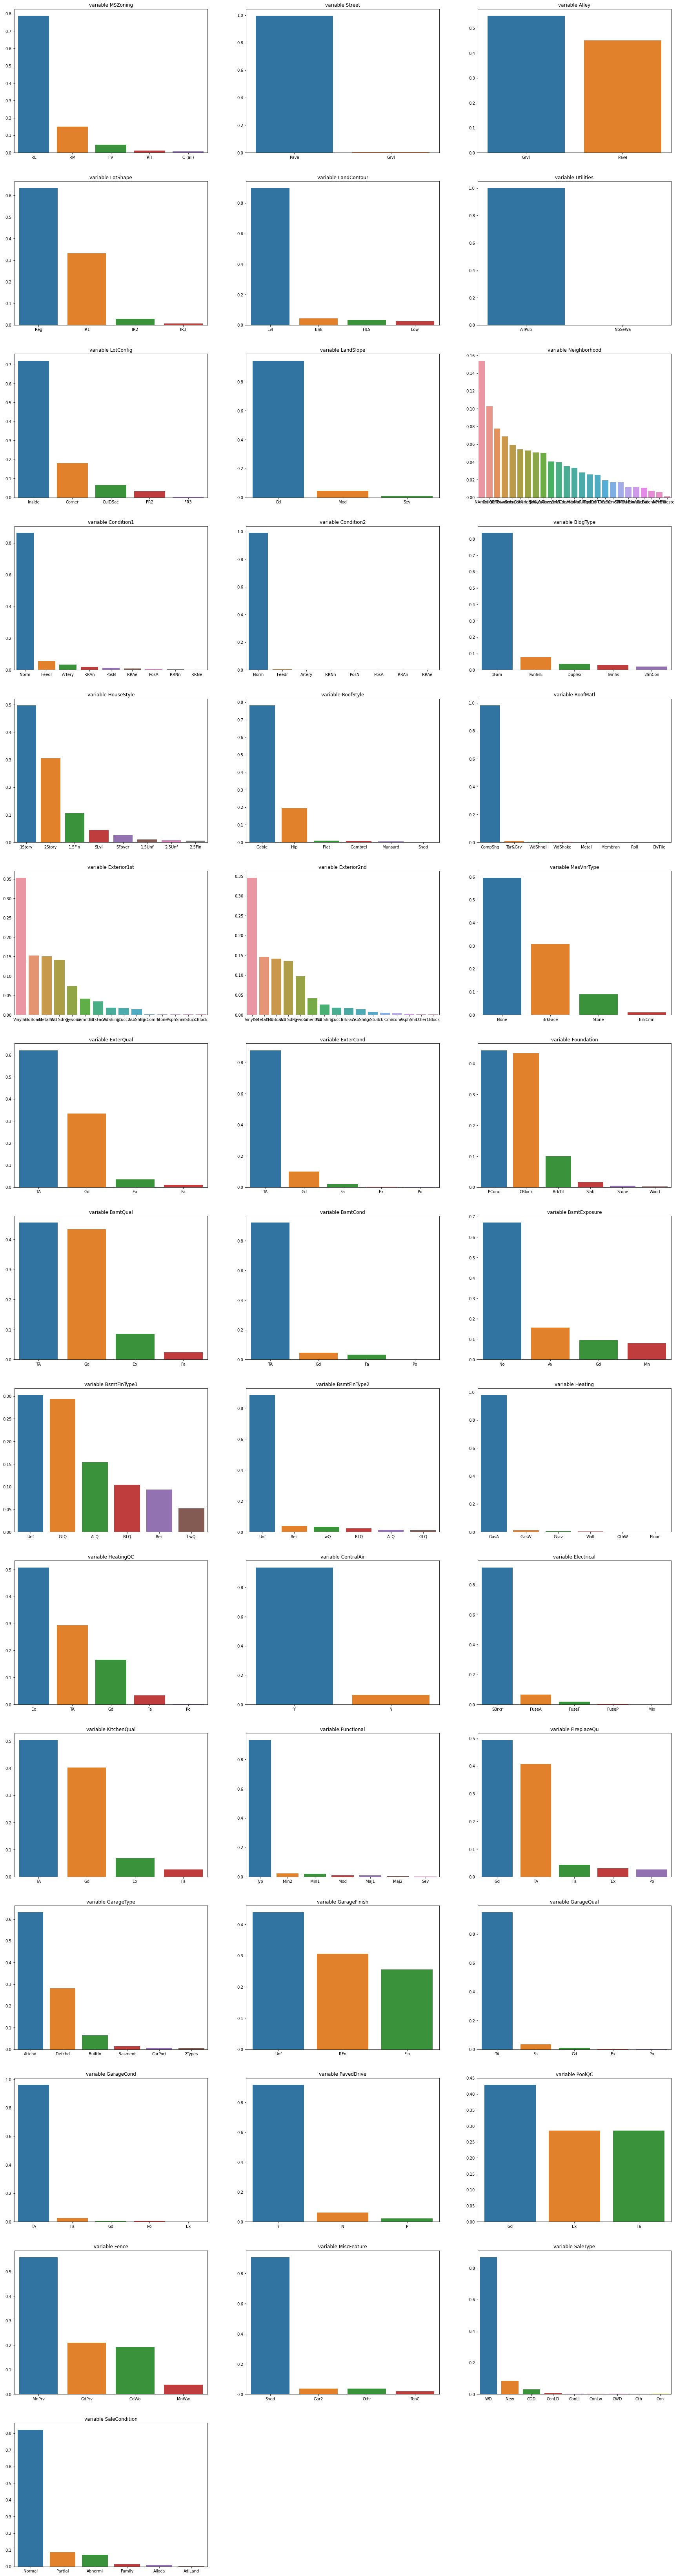

In [8]:
plt.figure(figsize=(30,120))
for i,var in enumerate(cat):
    plt.subplot(int(np.ceil(len(cat)/3)), 3, i+1)
    sns.barplot(y=data[var].value_counts(normalize=True).values, x=data[var].value_counts(normalize=True).keys())
    plt.title(f'variable {var}')
plt.show()    

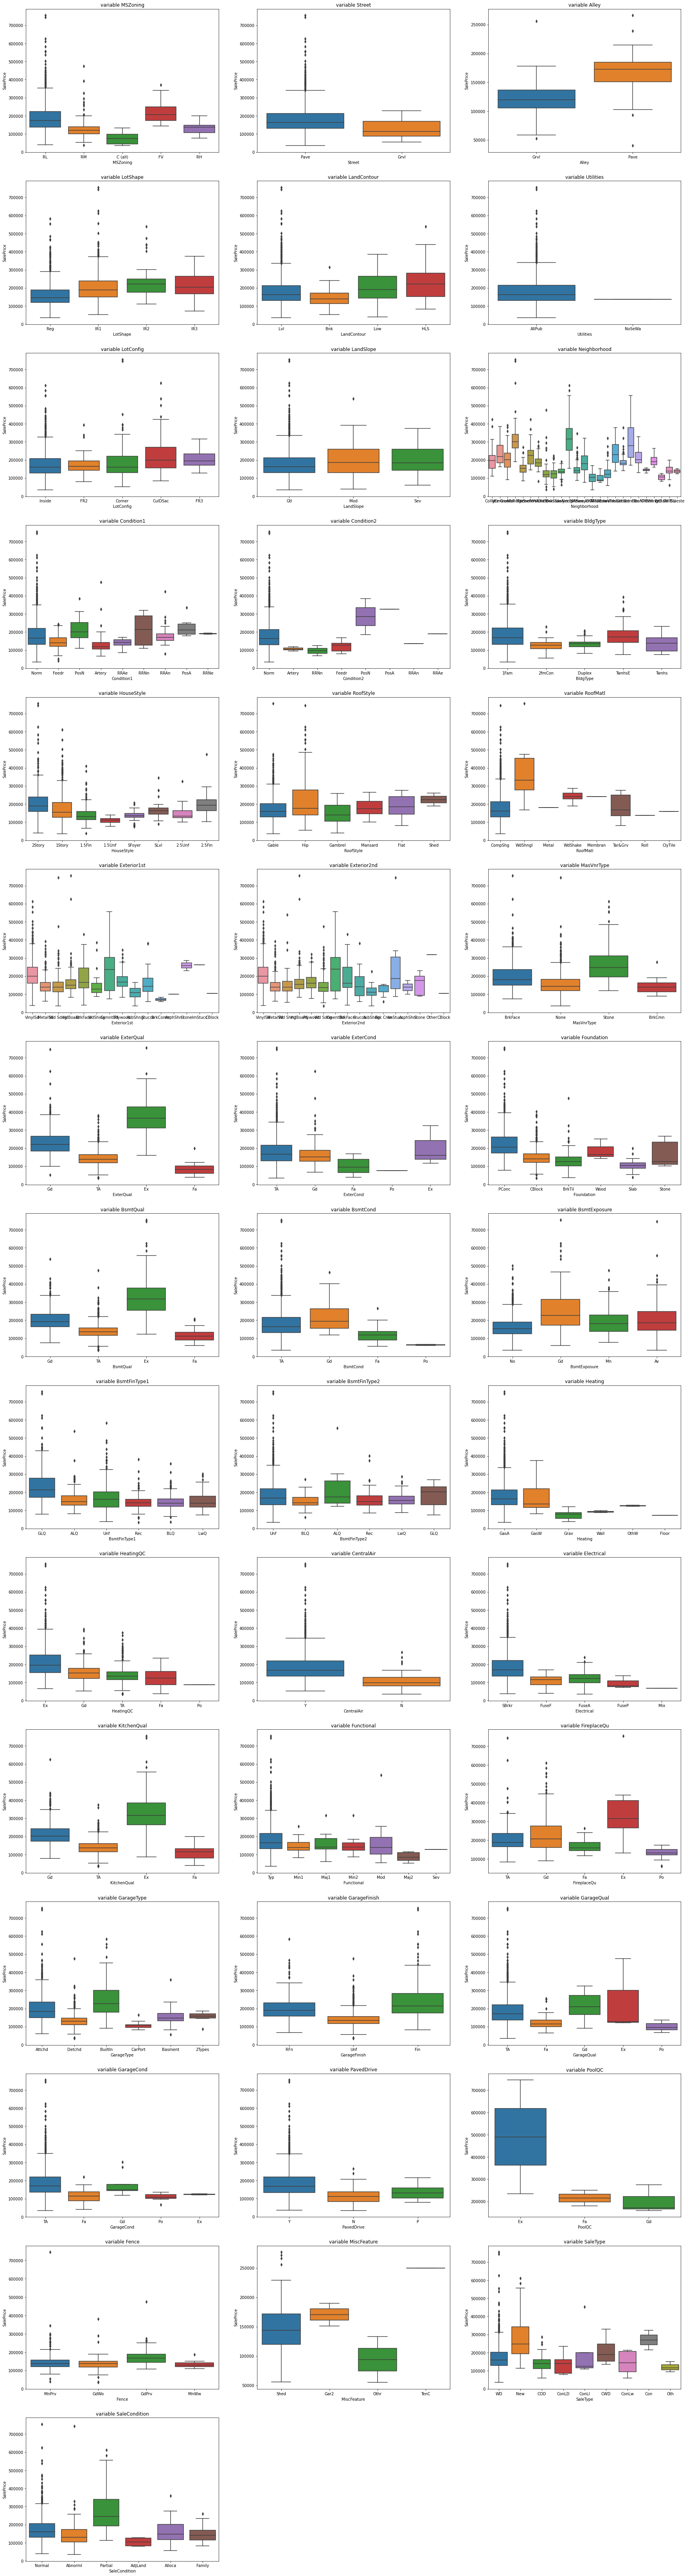

In [9]:
plt.figure(figsize=(30,120))
for i,var in enumerate(cat):
    plt.subplot(int(np.ceil(len(cat)/3)), 3, i+1)
    sns.boxplot(y=data['SalePrice'], x=data[var])
    plt.title(f'variable {var}')
plt.show() 

In [10]:
data['batch']='train'
test['batch']='test'

data=pd.concat([data, test], axis=0)


In [11]:

data.Alley=data.Alley.fillna('No Info')
data.MasVnrType=data.MasVnrType.fillna('Stone')
data.MasVnrArea=data.MasVnrArea.fillna(0)
data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']]\
=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']].fillna('No basement')
data.Electrical=data.Electrical.fillna('SBrkr')
data[['GarageType', 'GarageFinish','GarageQual','GarageCond']]=data[['GarageType', 'GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
data.loc[data.GarageYrBlt.isnull(),'GarageYrBlt']=0
data['PoolQC']=data['PoolQC'].fillna('No pool')
data['Fence']=data['Fence'].fillna('No Fence')
data['MiscFeature']=data.MiscFeature.fillna('No feature')
data['FireplaceQu']=data['FireplaceQu'].fillna('No Fireplace')

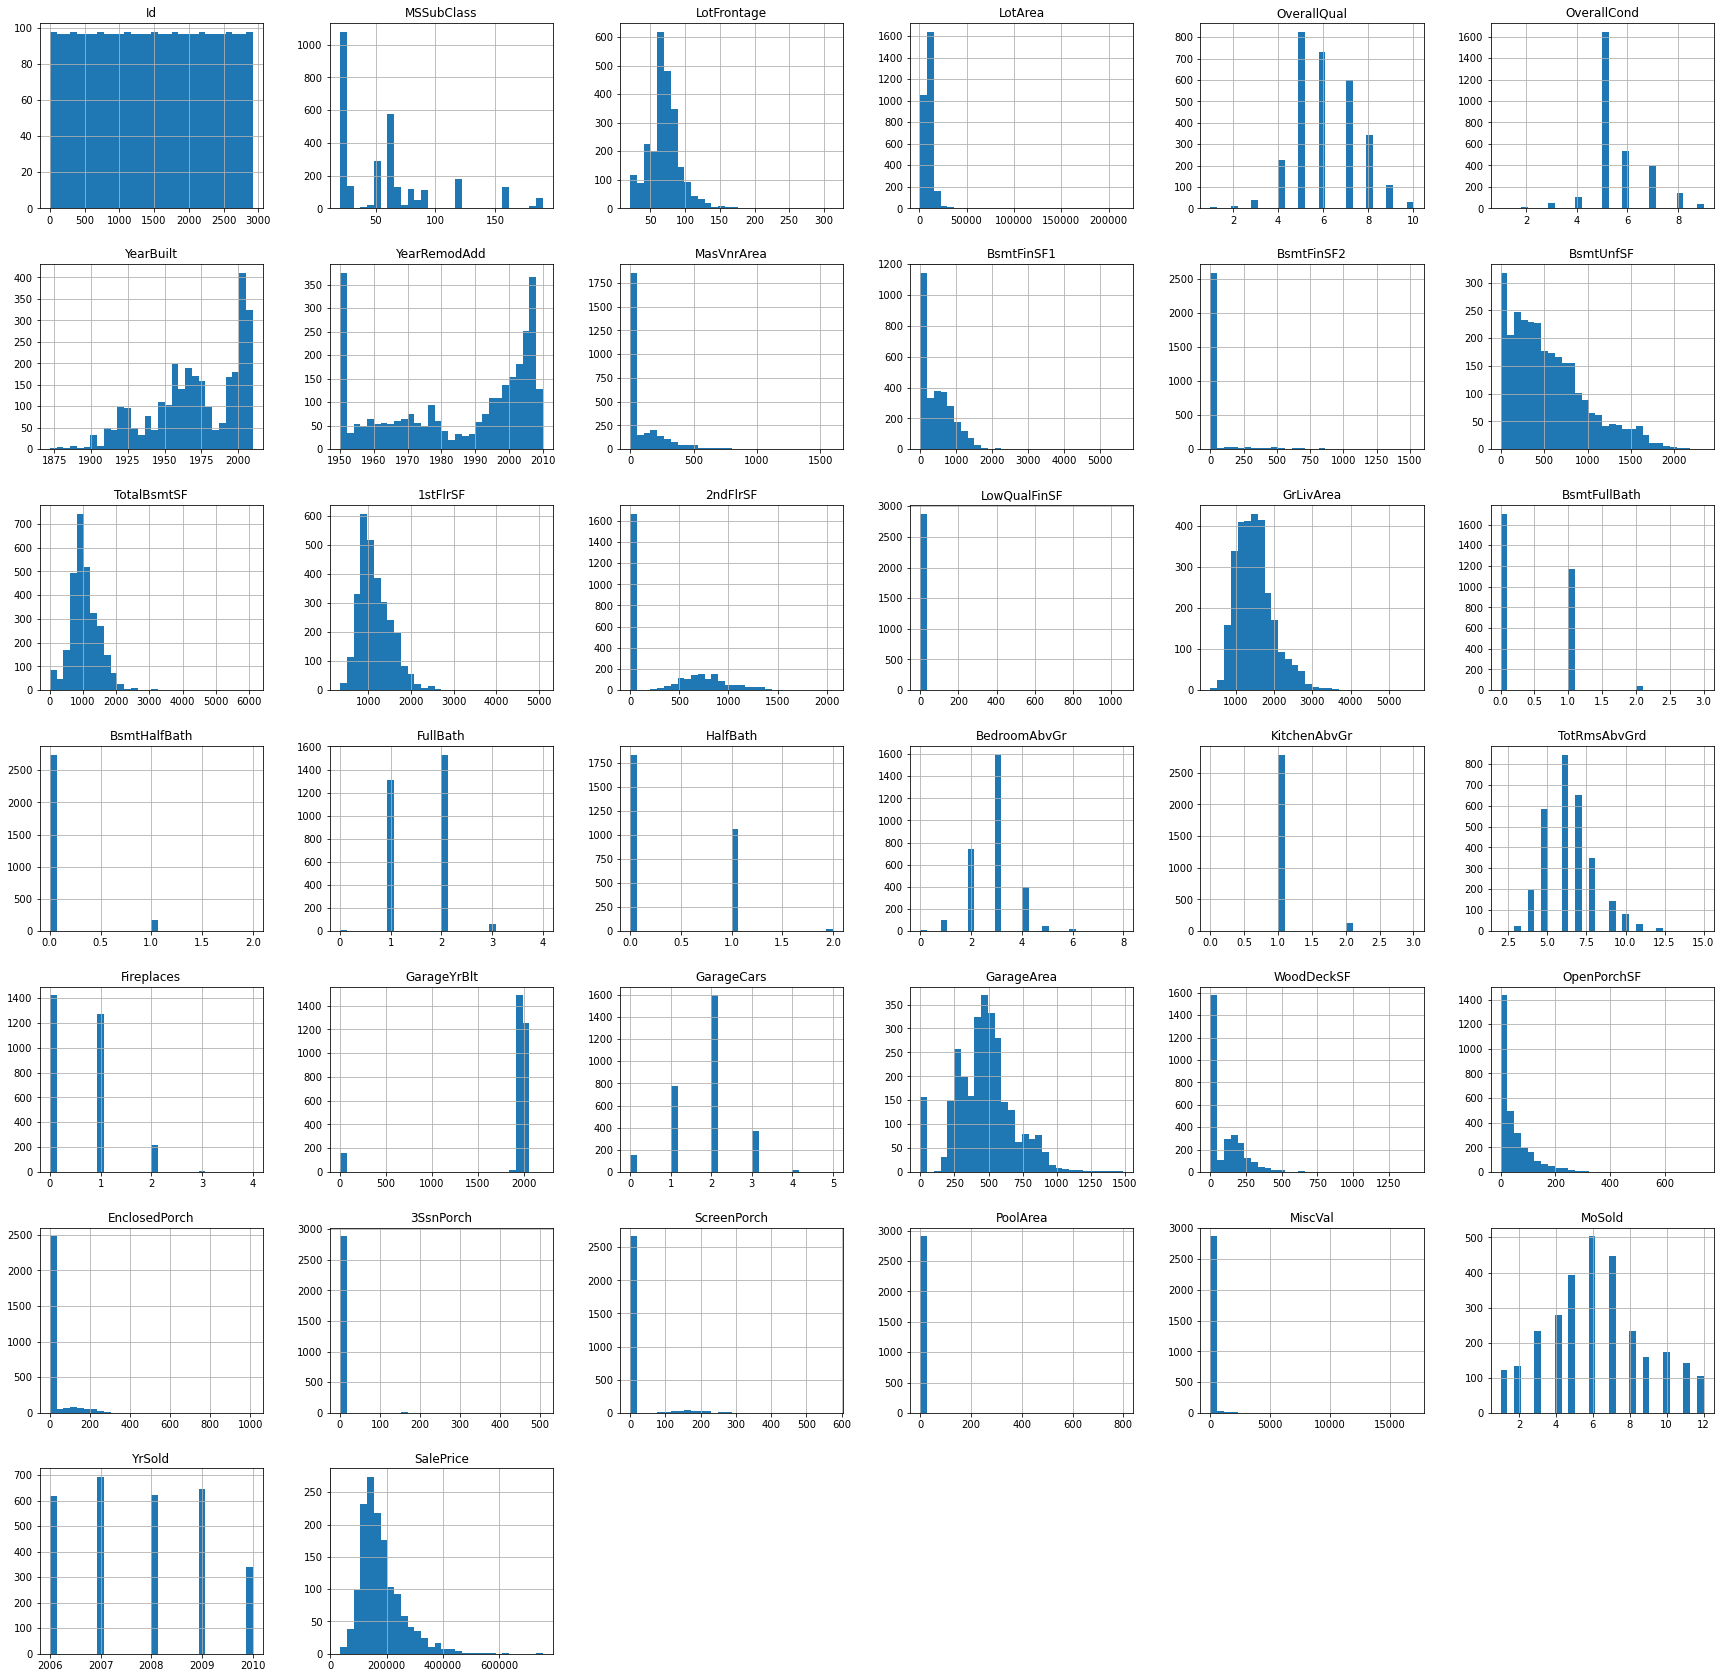

In [12]:
data.hist(figsize=(30,30), bins=30)
plt.show()

In [13]:
#data=data.drop('Id', axis=1)

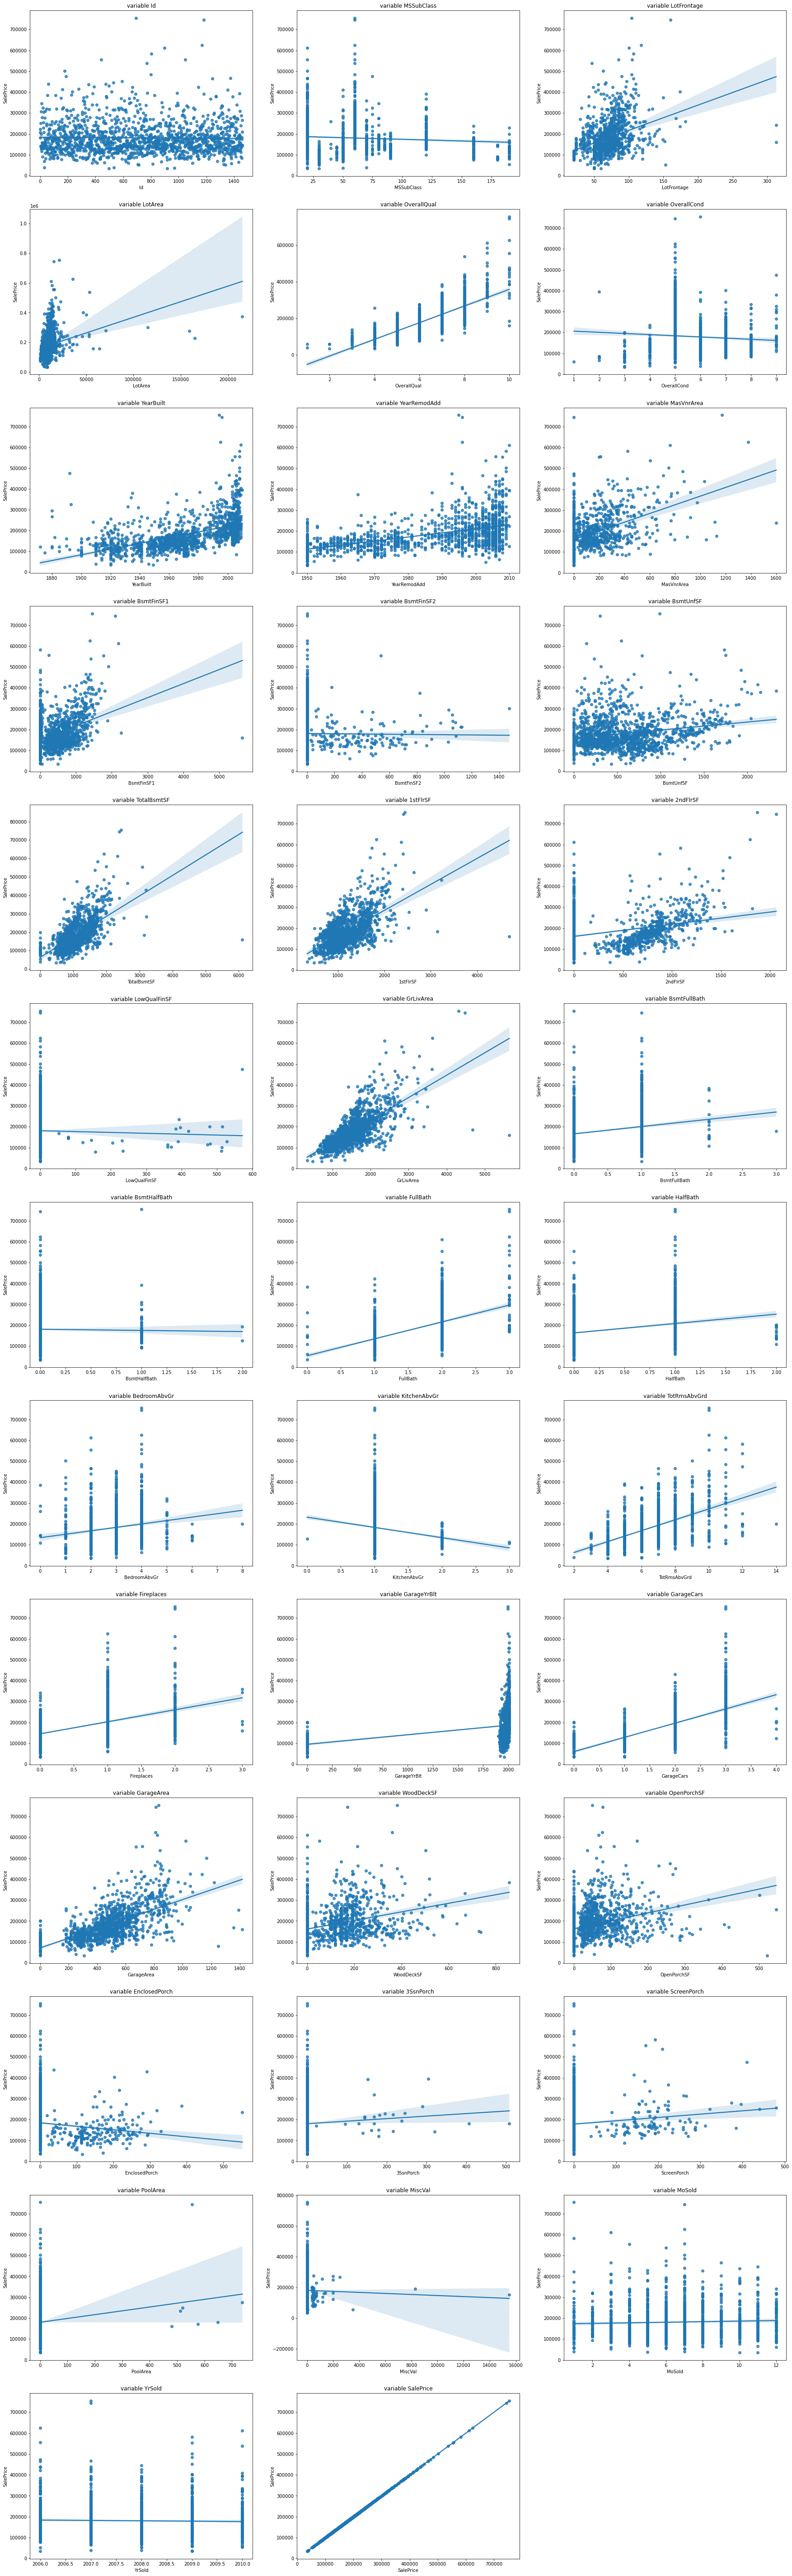

In [14]:
plt.figure(figsize=(30,120))
for i,var in enumerate(data.select_dtypes(exclude='object').columns):
    plt.subplot(int(np.ceil(len(cat)/3)), 3, i+1)
    sns.regplot(y=data['SalePrice'], x=data[var])
    plt.title(f'variable {var}')
plt.show() 

In [15]:
data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.026737,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.219139,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.026737,0.006309,0.219139,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301414,...,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654,0.472614
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.301414,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


In [16]:
#Let´s drop the variables:

#data=data.drop(['YrSold', 'BsmtFinSF2','MiscVal','PoolArea','EnclosedPorch','BsmtFinSF2','LowQualFinSF','MoSold','Utilities'], axis=1)

In [17]:
test=data[data.batch=='test']
test=test.drop('SalePrice', axis=1)
data=data[data.batch=='train']

data=data.drop('Id', axis=1)
data=data.drop(['YrSold', 'BsmtFinSF2','MiscVal','PoolArea','EnclosedPorch','BsmtFinSF2','LowQualFinSF','MoSold','Utilities'], axis=1)

In [18]:
y_train=data.SalePrice
X_train=data.drop('SalePrice', axis=1)

In [19]:
columns=X_train.columns

imputer=IterativeImputer(missing_values=np.nan)
X_train['LotFrontage']=imputer.fit_transform(X_train['LotFrontage'].values.reshape(-1,1), y_train)

X_train=pd.DataFrame(X_train, columns=columns)

#X_train_cat=X_train.select_dtypes(include='object')

#X_train=X_train.drop(X_train.select_dtypes(include='object').columns, axis=1)

#X_train=np.array(X_train)

encode=OrdinalEncoder()
#X_train_cat=encode.fit_transform(X_train_cat).todense()

#X_train=np.column_stack([X_train, X_train_cat])
X_train=encode.fit_transform(X_train, y_train)

scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)


In [20]:
cv=KFold(n_splits=5, random_state=0, shuffle=True)

n_round=10
xgb=XGBRegressor(n_round, n_estimators=100)
params={'max_depth':[2,3,4,5,6], 'eta': [0.1,0.2,0.3,0.4], 'objective': ['reg:squarederror'], 'alpha':[1, 1.2, 1.25, 1.3, 1.4]}

model=GridSearchCV(xgb, params, cv=cv )

In [21]:
model.fit(X_train, y_train)
model.best_params_

{'alpha': 1.3, 'eta': 0.3, 'max_depth': 4, 'objective': 'reg:squarederror'}

In [22]:
model.best_score_

0.890807117971115

In [23]:
pred=model.predict(X_train)

In [24]:
mean_squared_error(np.log(y_train),np.log(pred), squared=False)

0.04536222643679445

# Test Data

In [25]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [26]:
#test.loc[test.Utilities.isnull(), 'Utilities']='AllPub'
test.Alley=data.Alley.fillna('No Info')
test.MasVnrType=data.MasVnrType.fillna('Stone')
test.MasVnrArea=data.MasVnrArea.fillna(0)
test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']]\
=test[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']].fillna('No basement')
#test.loc[test.Electrical!='SBrkr','Electrical']='Fuse'
test[['GarageType', 'GarageFinish','GarageQual','GarageCond']]=test[['GarageType', 'GarageFinish','GarageQual','GarageCond']].fillna('No Garage')
test.loc[test.GarageYrBlt.isnull(),'GarageYrBlt']=0
test['PoolQC']=test['PoolQC'].fillna('No pool')
test['Fence']=test['Fence'].fillna('No Fence')
test.loc[test.MiscFeature!='Shed','MiscFeature']='No feature'
test['FireplaceQu']=test['FireplaceQu'].fillna('No Fireplace')

test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].value_counts().index[0]) 
for i in test.columns[4:]:
    test[i]=test[i].fillna(test[i].value_counts().index[0])

In [27]:
Id=test.Id
test=test.drop(['YrSold', 'BsmtFinSF2','MiscVal','PoolArea','EnclosedPorch','BsmtFinSF2','LowQualFinSF','MoSold','Utilities','Id','batch'], axis=1)

In [28]:
test.LotFrontage=imputer.transform(test.LotFrontage.values.reshape(-1,1))

test=pd.DataFrame(test, columns=columns)


test=encode.transform(test)


test=scaler.transform(test)



MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath  

ValueError: Some of the variables to transform contain NaN. Check and remove those before using this transformer.

In [ ]:
SalePrice=pd.DataFrame(model.predict(test), index=Id, columns=['SalePrice']).reset_index()

In [ ]:
SalePrice.to_csv(r'C:\Users\gshoc\OneDrive\Documentos\Kaggle\Competitions\price5.csv', index=False)